# Classification on baseline 2months and 4 months

Compared to `Classification-model_builder`these models seem to perform worse on the first trials. I have done an oversampling of the minority class to get more samples in the training set. Randomized Grid Search is also used to find the optimum paramaters, but they do not seem to work very well yet. A nor

In [80]:
import pandas as pd
import xgboost as xgb
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt

import src.model_builder as mb
import src.modules as modules
import src.data_handling as dh
from src.model_selection import XGBGridSearch

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
VS_base = dh.VariableSelector("Cancer_baseline")

In [10]:
X_base, y_base, _a = VS_base.extract_data("ESR1", diff_lim=0, verbose=1)

Counting NaNs:


  0%|          | 0/27938 [00:00<?, ?it/s]

Computing correlation and p-value:


  0%|          | 0/27938 [00:00<?, ?it/s]

Selected 1000 input genes with alpha = 7.000000000000001e-23


In [24]:
y_base = pd.cut(y_base, bins=[-99,0.5,99],labels=["0","1"])
y_base = pd.to_numeric(y_base)

In [25]:
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base, y_base, random_state=42)

In [41]:
X_base_res = X_base_train.replace({np.nan:0})

In [42]:
sm = SMOTE(random_state=42)

In [43]:
X_base_res, y_base_res = sm.fit_resample(X_base_res, y_base_train)

In [92]:
params = {'objective': "binary:logistic",
         'num_class' : 1,
         'learning_rate': 0.025,
         'max_depth': 4,
         'min_child_weight': 5,
         'colsample_bylevel': 1,
         'colsample_bynode': 1,
         'colsample_bytree': 1,
         'n_jobs': 40,
         'seed' : 42, 
         'n_estimators': 1000}

In [52]:
clf = xgb.XGBClassifier(**params, use_label_encoder=False)

In [64]:
param_test = { 'learning_rate' : uniform(0.02, 1),
                'max_depth' : randint(1,10),
                'min_child_weight' : randint(1,10),
                'colsample_bynode': uniform(0.8, 0.2),
                'colsample_bytree': uniform(0.8, 0.2),
                'n_estimators' : randint(500,1000)
}

In [56]:
GS = XGBGridSearch(clf, param_test, n_jobs=40, cv=5)

In [ ]:
GS.fit(X_base_res, y_base_res)

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
RSCV = RandomizedSearchCV(clf, param_test, n_iter=20)

In [66]:
RSCV.fit(X_base_res, y_base_res)

[14:01:36] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:01:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:02:18] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:02:40] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[14:11:27] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:46] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:12:08] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:12:17] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[14:17:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:24] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:42] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:00] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[14:26:33] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:38] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:57] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:15] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.025,
                                           max_delta_step=None, max_depth=4,
                                           min_child_weight=5, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=40,
                                           num_class...
                                        'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f598fe71280>,
                        

In [69]:
RSCV.best_params_

{'colsample_bynode': 0.8295194422721656,
 'colsample_bytree': 0.9846004887183012,
 'learning_rate': 0.4339080926274773,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 737}

In [70]:
for p in RSCV.best_params_:
    params[p] = RSCV.best_params_[p]

In [93]:
clf = xgb.XGBClassifier(**params, use_label_encoder=False)

In [95]:
clf.fit(X_base_res, y_base_res, verbose=40, eval_set = [(X_base_res, y_base_res)], eval_metric=["auc"], )

[0]	validation_0-auc:0.74433
[40]	validation_0-auc:0.83264
[80]	validation_0-auc:0.86060
[120]	validation_0-auc:0.88010
[160]	validation_0-auc:0.89427
[200]	validation_0-auc:0.90516
[240]	validation_0-auc:0.91352
[280]	validation_0-auc:0.92110
[320]	validation_0-auc:0.92768
[360]	validation_0-auc:0.93327
[400]	validation_0-auc:0.93803
[440]	validation_0-auc:0.94240
[480]	validation_0-auc:0.94598
[520]	validation_0-auc:0.95008
[560]	validation_0-auc:0.95332
[600]	validation_0-auc:0.95655
[640]	validation_0-auc:0.95930
[680]	validation_0-auc:0.96240
[720]	validation_0-auc:0.96466
[760]	validation_0-auc:0.96732
[800]	validation_0-auc:0.96957
[840]	validation_0-auc:0.97197
[880]	validation_0-auc:0.97416
[920]	validation_0-auc:0.97592
[960]	validation_0-auc:0.97799
[999]	validation_0-auc:0.97977


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.025, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=40, num_class=1, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [96]:
y_pred = clf.predict(X_base_test)

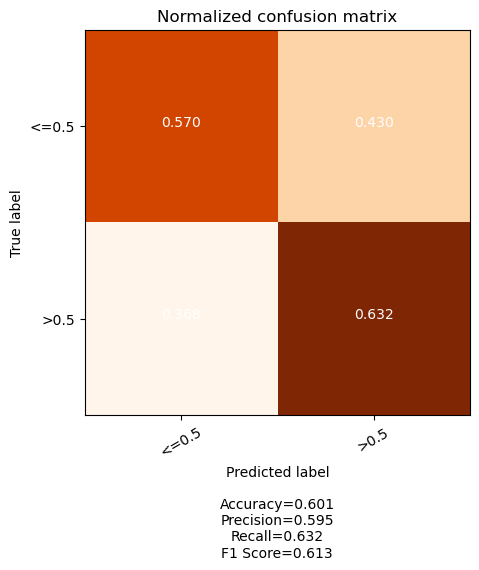

In [98]:
cm_norm = confusion_matrix(y_base_test, y_pred, normalize="true")
fig, ax = plt.subplots()
modules.plot_confusion_matrix(cm_norm, labels=["<=0.5", ">0.5"], fig=fig, ax=ax, title="Normalized confusion matrix")
plt.show()